# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

278

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# create a dictionary to hold target info from API
city_info = {"City":[], "Lat":[], "Lng":[], "Max Temp": [], "Humidity": [],
             "Cloudiness":[], "Wind Speed": [], "Country":[], "Date": []}
 
# keep track of API request
x, i = 1, 1

# gather data
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}").json()
        if city not in city_info:
            city_info["City"].append(response["name"])
            city_info["Lat"].append(response["coord"]["lat"])
            city_info["Lng"].append(response["coord"]["lon"])
            city_info["Max Temp"].append(response["main"]["temp_max"])
            city_info["Humidity"].append(response["main"]["humidity"])
            city_info["Cloudiness"].append(response["clouds"]["all"])
            city_info["Wind Speed"].append(response["wind"]["speed"])
            city_info["Country"].append(response["sys"]["country"])
            city_info["Date"].append(response["dt"])
            print(f"Processing Record {x} of Set {i} | {city}")
    except KeyError:
        print("Oops, there's no data for",city,".")
    x += 1
    if x > 50:
        x = 1
        i += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | fillmore
Processing Record 2 of Set 1 | bellavista
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | port alfred
Oops, there's no data for louisbourg .
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | novoagansk
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | kontagora
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | kutum
Processing Record 21 of Set 1 | bongandanga
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Se

Oops, there's no data for tumannyy .
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | jever
Processing Record 3 of Set 5 | kiboga
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | san francisco
Oops, there's no data for illoqqortoormiut .
Processing Record 8 of Set 5 | tripoli
Oops, there's no data for stoyba .
Oops, there's no data for chagda .
Processing Record 11 of Set 5 | cedral
Processing Record 12 of Set 5 | matara
Processing Record 13 of Set 5 | kapaa
Processing Record 14 of Set 5 | botshabelo
Processing Record 15 of Set 5 | maumere
Processing Record 16 of Set 5 | kibala
Processing Record 17 of Set 5 | tecoanapa
Processing Record 18 of Set 5 | eyrarbakki
Processing Record 19 of Set 5 | rocha
Processing Record 20 of Set 5 | bengkulu
Processing Record 21 of Set 5 | quatre cocos
Oops, there's no data for kuche .
Processing Record 23 of Set 5 | vallenar
Processing Record 24 of Set 5 | praia da vitoria
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# create df
city_data = pd.DataFrame(city_info)

#display(city_data)

# export to csv
#city_data.to_csv(city_data)

In [25]:
# display df
print(city_data)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        Fillmore  43.6666  -92.1002     49.48        66           1   
1      Bellavista  -7.0561  -76.5911     72.68        90          76   
2          Aykhal  66.0000  111.5000      6.28        97          99   
3     Port Alfred -33.5906   26.8910     67.10        85          99   
4           Sitka  57.0531 -135.3300     49.89        57          75   
..            ...      ...       ...       ...       ...         ...   
249  Finote Selam  10.7000   37.2667     58.84        81         100   
250  Saint George  37.1041 -113.5841     59.63        42          20   
251          Safi  32.2994   -9.2372     64.63        86           0   
252        Banjar  -8.1900  114.9675     85.91        73          89   
253          Mitú   1.1983  -70.1733     73.06        98         100   

     Wind Speed Country        Date  
0         10.36      US  1635298755  
1          0.36      PE  1635298756  
2          5.66      

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
clean_df = city_data.drop(columns=["City", "Country"])
#print(clean_df)

Hum_100 = {}

# create summary table where humidity is less than 100%
for column in clean_df.columns:
    Hum_100[column] = [clean_df[column].count(),
                         clean_df[column].mean(),
                         clean_df[column].std(),
                         clean_df[column].min(),
                         clean_df[column].quantile(.25),
                         clean_df[column].quantile(.50),
                         clean_df[column].quantile(.75),
                         clean_df[column].max()]
H100_df = pd.DataFrame(Hum_100)
index_names = {0:'count', 1:'mean', 2:'std', 3:'min', 4:'25%', 5:'50%', 6:'75%', 7:'max'}
H100_df = H100_df.rename(index=index_names)
H100_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,19.618526,7.214500,59.098583,74.389764,61.988189,8.389724,1.635299e+09
std,35.320636,92.852554,21.072128,18.763813,39.632250,6.744201,2.151208e+02
min,-54.800000,-175.200000,-13.680000,9.000000,0.000000,0.000000,1.635298e+09
25%,-8.813850,-71.037150,47.940000,65.000000,20.000000,3.410000,1.635298e+09
50%,25.900450,13.884050,64.505000,80.000000,76.500000,6.910000,1.635299e+09
75%,49.441675,80.543625,74.995000,88.000000,99.000000,11.980000,1.635299e+09
max,78.218600,178.416700,92.140000,100.000000,100.000000,43.870000,1.635299e+09


In [27]:
#  Get the indices of cities that have humidity over 100%.
humidity = clean_df[clean_df["Humidity"] >= 100]
humidity.index

Int64Index([20, 41, 168, 174, 213], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = clean_df.drop(humidity.index)
clean_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,43.6666,-92.1002,49.48,66,1,10.36,1635298755
1,-7.0561,-76.5911,72.68,90,76,0.36,1635298756
2,66.0000,111.5000,6.28,97,99,5.66,1635298560
3,-33.5906,26.8910,67.10,85,99,29.77,1635298419
4,57.0531,-135.3300,49.89,57,75,8.05,1635298756
...,...,...,...,...,...,...,...
249,10.7000,37.2667,58.84,81,100,2.46,1635298856
250,37.1041,-113.5841,59.63,42,20,1.01,1635298623
251,32.2994,-9.2372,64.63,86,0,2.77,1635298717
252,-8.1900,114.9675,85.91,73,89,0.72,1635298856


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

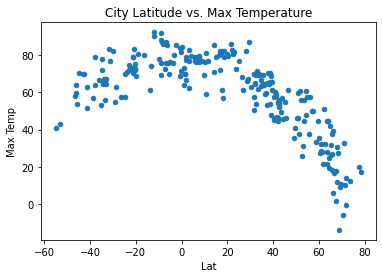

In [29]:
scatter1 = clean_city_data.plot.scatter(x='Lat',
                    y='Max Temp',
                    title = "City Latitude vs. Max Temperature")

## Latitude vs. Humidity Plot

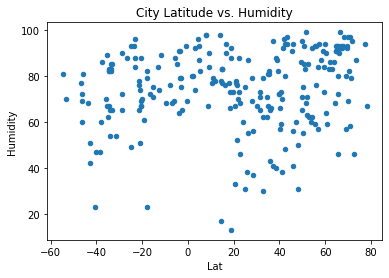

In [13]:
scatter2 = clean_city_data.plot.scatter(x='Lat',
                    y='Humidity',
                    title = "City Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

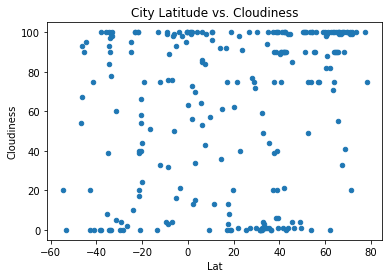

In [30]:
scatter3 = clean_city_data.plot.scatter(x='Lat',
                    y='Cloudiness',
                    title = "City Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

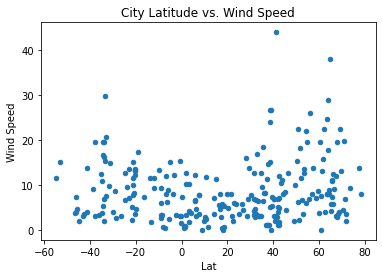

In [31]:
scatter3 = clean_city_data.plot.scatter(x='Lat',
                    y='Wind Speed',
                    title = "City Latitude vs. Wind Speed")

In [ ]:
# code for renaming columns
#df_better_columns =df_clean.rename(columns={"Lat":"Latitude", "Lng":"Logitude", "Max Temp":"Max Temperature (F)",
#                                   "Humidity": "Humidity (%)", "Cloudiness":"Cloudiness (%)",
#                                  "Wind Speed":"Wind Speed (mph)"})

## Linear Regression

In [32]:
nh_weather = clean_city_data[clean_city_data["Lat"] > 0]
sh_weather = clean_city_data[clean_city_data["Lat"] < 0]
#nh_weather.describe()
#sh_weather.describe()

In [33]:
print(nh_weather)

         Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed        Date
0    43.6666  -92.1002     49.48        66           1       10.36  1635298755
2    66.0000  111.5000      6.28        97          99        5.66  1635298560
4    57.0531 -135.3300     49.89        57          75        8.05  1635298756
6    77.4840  -69.3632     20.07        94         100       13.76  1635298423
9    14.8961  -24.4956     78.93        77          61       11.36  1635298725
..       ...       ...       ...       ...         ...         ...         ...
248  67.4667   78.7000     17.98        95         100       12.01  1635298621
249  10.7000   37.2667     58.84        81         100        2.46  1635298856
250  37.1041 -113.5841     59.63        42          20        1.01  1635298623
251  32.2994   -9.2372     64.63        86           0        2.77  1635298717
253   1.1983  -70.1733     73.06        98         100        0.78  1635298846

[169 rows x 7 columns]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
north_weather = nh_weather.rename(columns={"Lat":"Latitude", "Lng":"Logitude", "Max Temp":"Max_Temperature", "Humidity":"Humidity", "Cloudiness":"Cloudiness", "Wind Speed":"Wind_Speed"})

south_weather = sh_weather.rename(columns={"Lat":"Latitude", "Lng":"Logitude", "Max Temp":"Max_Temperature", "Humidity":"Humidity", "Cloudiness":"Cloudiness", "Wind Speed":"Wind_Speed"})

-0.8607305874677124


Text(0, 0, 'y=84.06+-0.83*x')

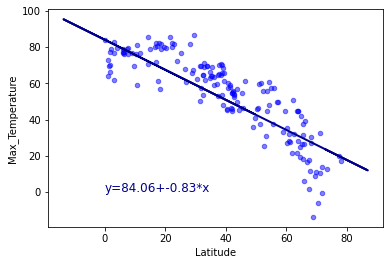

In [54]:
r = north_weather.corr(method='pearson', min_periods=1)
print(r['Max_Temperature']['Latitude'])
temp_fit = np.polyfit(north_weather.Max_Temperature, north_weather.Latitude, 1)
lr_scatter1 = north_weather.plot.scatter(x='Latitude', y='Max_Temperature', color='blue', alpha=0.5)
plt.plot(north_weather.Max_Temperature, temp_fit[0] * north_weather.Max_Temperature + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, 0, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.68353106588339


Text(-40, -40, 'y=-89.01+0.92*x')

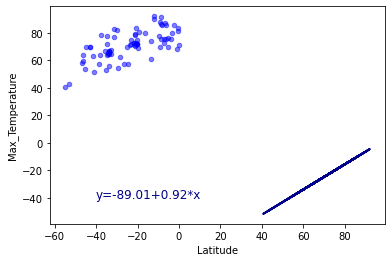

In [59]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Max_Temperature']['Latitude'])
temp_fit = np.polyfit(south_weather.Max_Temperature, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Latitude', y='Max_Temperature', color='blue', alpha=0.5)
plt.plot(south_weather.Max_Temperature, temp_fit[0] * south_weather.Max_Temperature + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(-40, -40, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Max_Temperature']['Latitude'])
temp_fit = np.polyfit(south_weather.Max_Temperature, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Latitude', y='Max_Temperature', color='blue', alpha=0.5)
plt.plot(south_weather.Max_Temperature, temp_fit[0] * south_weather.Max_Temperature + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(-40, -40, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression